## Author: ABSAR AHMED

## Task#1

## Object
Predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables. You can use R, Python, SAS Enterprise Miner or any other tool. What will be predicted score if a student studies for 9.25 hrs/ day?

# Import Libraries 

In [39]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [40]:
df = pd.read_csv(r'C:\Users\Absar\Desktop\student_scores - student_scores.csv')

In [41]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [42]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [43]:
df.shape

(25, 2)

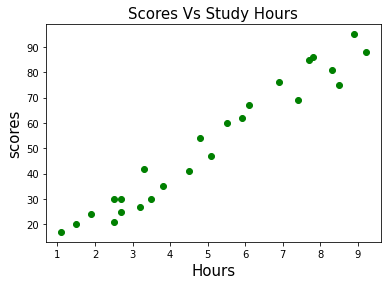

In [44]:
plt.title('Scores Vs Study Hours',size=15)
plt.xlabel('Hours', size= 15)
plt.ylabel('scores', size =15)
plt.scatter(df.Hours,df.Scores, color='green')

#From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

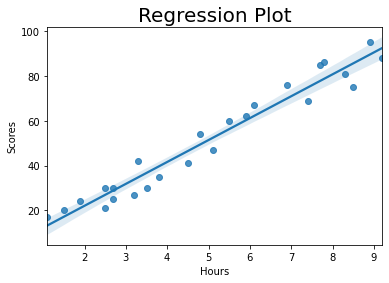

In [45]:
plt.title('Regression Plot',size=20)
sns.regplot(x="Hours", y="Scores",data=df)
plt.show()

In [46]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


# split the Data

In [47]:
X = df.iloc[:,:-1].values
y = df.iloc[:, 1].values

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=0)

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Plot the Regression Line

In [50]:
line = lr.coef_*X+lr.intercept_

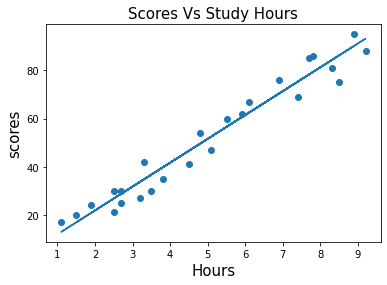

In [51]:
plt.title('Scores Vs Study Hours',size=15)
plt.xlabel('Hours', size= 15)
plt.ylabel('scores', size =15)
plt.scatter(X,y)
plt.plot(X, line);
plt.show()

# prediction

In [52]:
linear= lr.predict(X_test)

In [53]:
linear

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing Actual vs Prediction

In [54]:
df= pd.DataFrame({'Actual':y_test, 'Predicted':linear})

In [55]:
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


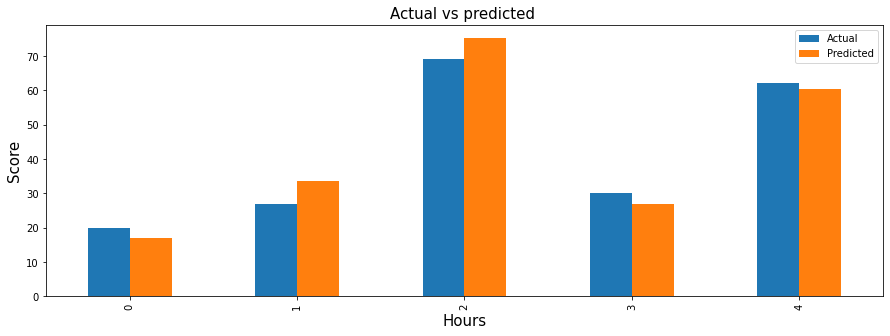

In [56]:
ax = df.plot(kind = 'bar', figsize =(15, 5))
plt.title('Actual vs predicted ',size=15)
ax.set_xlabel("Hours", size=15)
ax.set_ylabel("Score", size=15)
plt.show()

# Prediction for 9.25/hrs

In [57]:
hours = 9.25
test = np.array([[hours]])
pred = lr.predict(test)


In [58]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Mean Squared Error

In [62]:
from sklearn.metrics import mean_squared_error

In [65]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_squared_error(y_test, linear))

Mean Absolute Error: 21.5987693072174
